In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# load dataset
dataset = pd.read_csv("dataset/data_filtered.csv")
dataset = dataset.iloc[:, :]
dataset.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,1,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,1,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,1,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,1,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),0,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,married,Over 23 years old,1,Management (evening attendance),0,Basic education 3rd cycle (9th/10th/11th year)...,133.1,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,single,1st phase - general contingent,1,Nursing,1,Secondary education,142.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,single,3rd phase - general contingent,4,Tourism,1,Secondary education,119.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,single,1st phase - general contingent,3,Social Service,1,Secondary education,137.0,Romanian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,single,1st phase - general contingent,1,Social Service,1,Secondary education,138.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [4]:
# print dataset dimensionality
def get_dimensionality(data):        
    print(f"#samples = {data.shape[0]}")
    print(f"#features = {data.shape[1]}")

In [5]:
get_dimensionality(dataset)

#samples = 4424
#features = 37


In [6]:
# manage metadata
def get_metadata(data):
    metadata = {}
    metadata["numerical"] = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    metadata["categorical"] = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", metadata["numerical"])
    print("Categorical features: ", metadata["categorical"])
    
    return metadata

In [7]:
get_metadata(dataset)

Numerical features:  ['Application order', 'Daytime/evening attendance\t', 'Previous qualification (grade)', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical features:  ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's

{'numerical': ['Application order',
  'Daytime/evening attendance\t',
  'Previous qualification (grade)',
  'Admission grade',
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Scholarship holder',
  'Age at enrollment',
  'International',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)',
  'Unemployment rate',
  'Inflation rate',
  'GDP'],
 'categorical': ['Marital status',
  'Application mode',
  'Course',
  'Previous qualification',
  'Nacionality',
  "Mother's qualification",
  "Father's

In [8]:
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name = "missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()
    cleaned_data = data.dropna()

    return cleaned_data

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


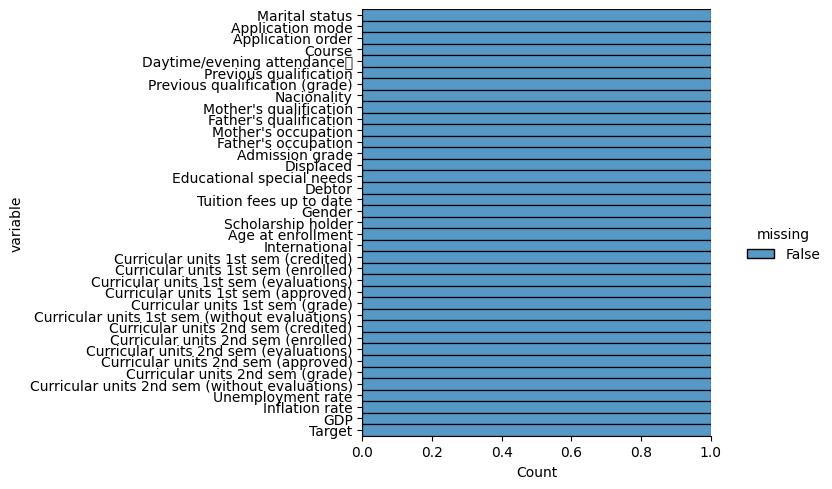

In [9]:
dataset = filter_missing(dataset)

In [10]:
print("New dimensionality after filtering")
get_dimensionality(dataset)

New dimensionality after filtering
#samples = 4424
#features = 37


4. Data Visualization for numerical variables
Histogram

In [23]:
variables = ["Application order", "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)","International"]

In [24]:
def hist_frequencies(data, variables, bins = 10):
    ncol_plots = 2
    nrow_plots = (len(variables) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange","red","blue"]

    for i, col in enumerate(variables):
        sbn.histplot(data = data[col], ax = ax[i], color = colors[i], bins = bins)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
        ax[i].set_title(f"Histogram of Frequencies for {col}", fontsize = 14)
        
    plt.tight_layout()
    plt.show()

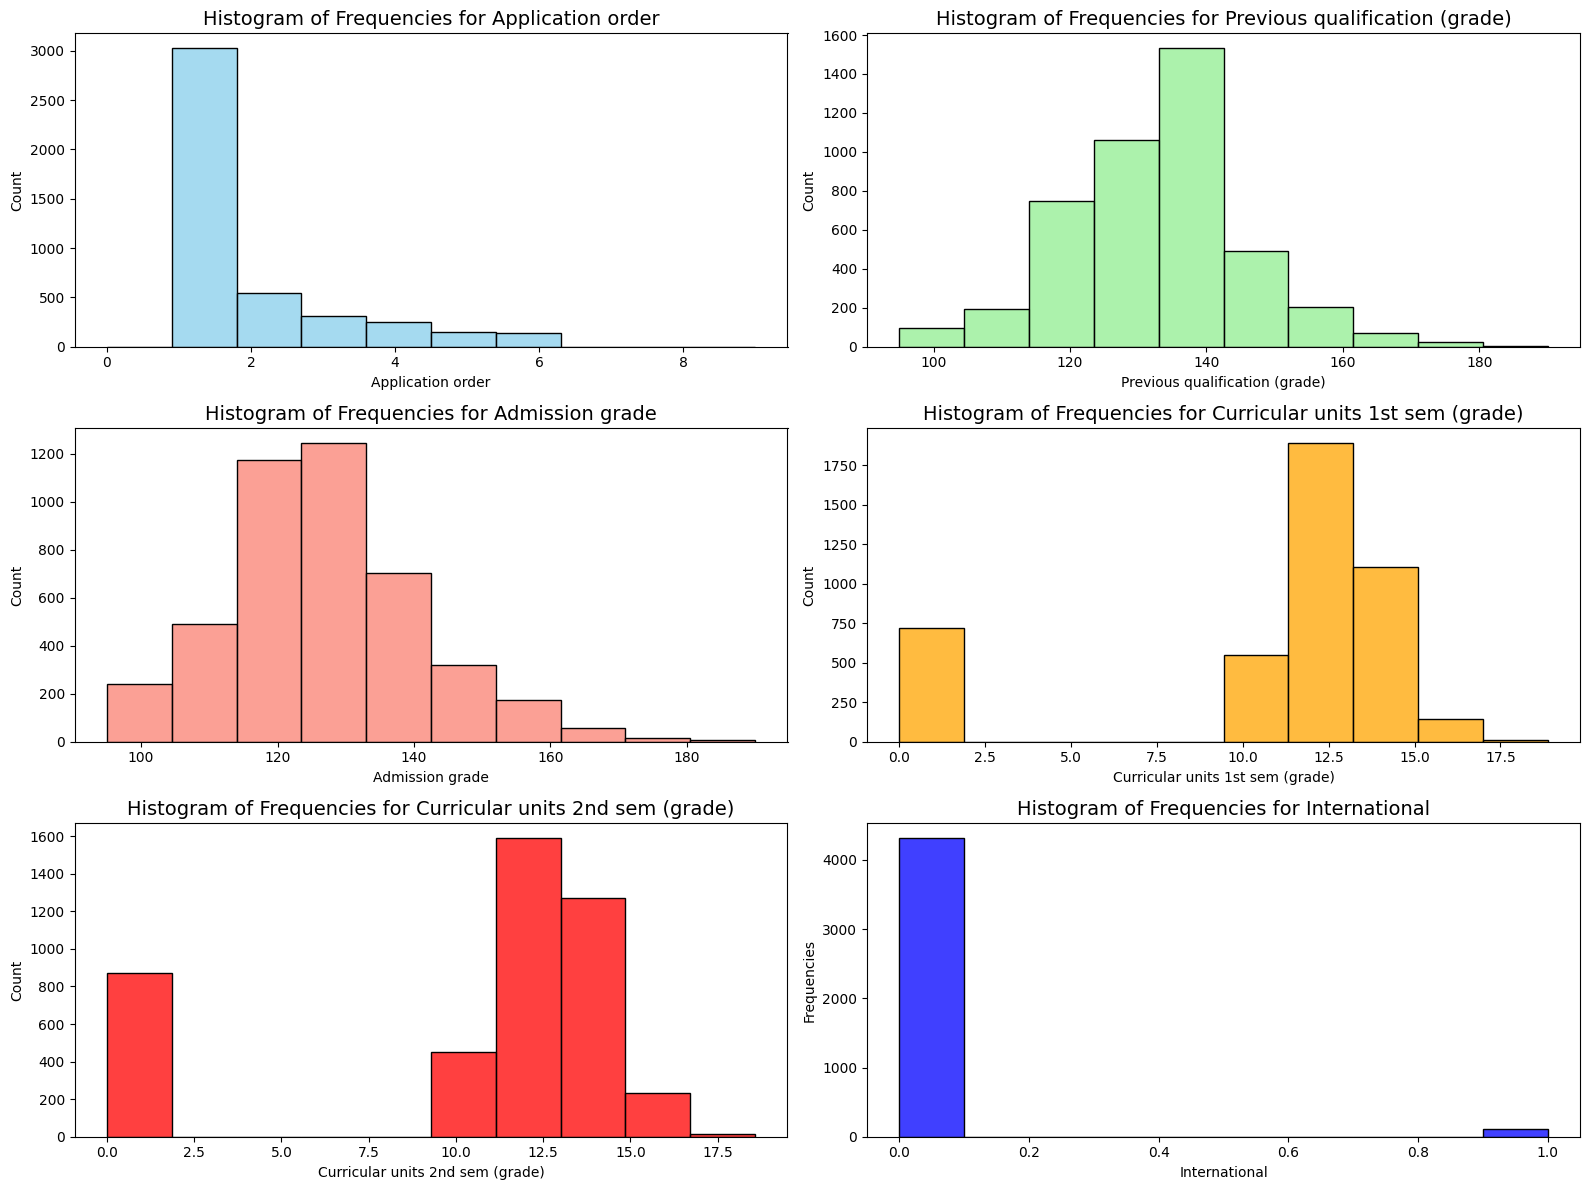

In [25]:
hist_frequencies(dataset, variables)

Bivariate charts

In [26]:
def bivariate_plots(data, x_var, y_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange"]

    for i, col in enumerate(x_var):
        ax[i] = sbn.barplot(data = data, x = col, y = y_var, ax = ax[i], color = colors[i], errorbar = None)
        ax[i].bar_label(ax[i].containers[0], fontsize = 10)
        ax[i].set_title(f"{y_var} vs {col}", fontsize = 14)
        plt.xlabel(col)
        plt.ylabel(y_var)
        
    plt.tight_layout()
    plt.show()

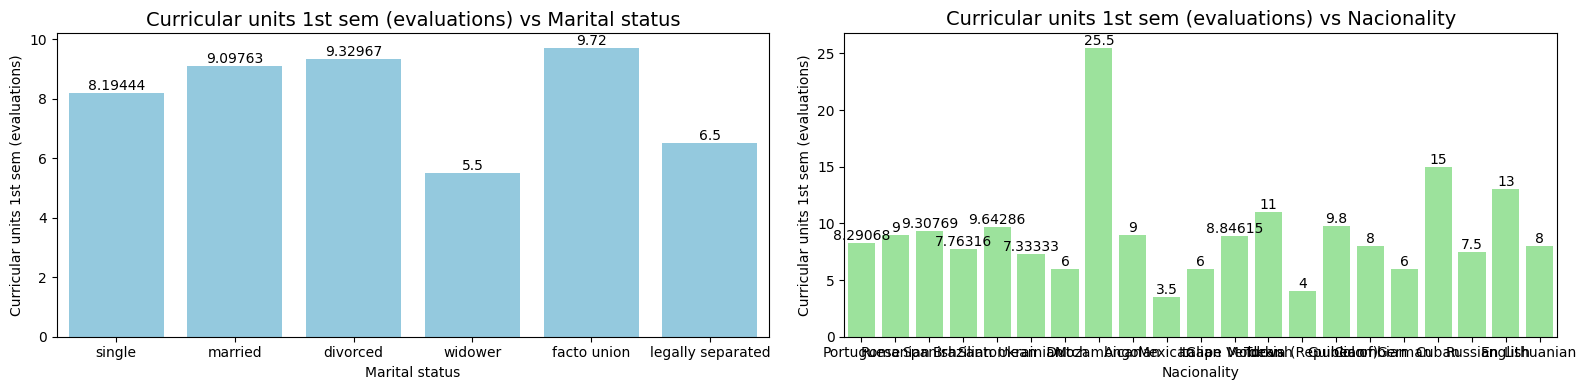

In [27]:
bivariate_plots(data = dataset, x_var = ["Marital status", "Nacionality"], y_var = "Curricular units 1st sem (evaluations)")

Box Plot

In [29]:
def get_boxplot(data, x_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange", "red", "purple"]

    for i, col in enumerate(x_var):
        sbn.boxplot(data = data, x = col, ax = ax[i], color = colors[i])
        ax[i].set_title(f"Box Plot for {col}", fontsize = 14)
        ax[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

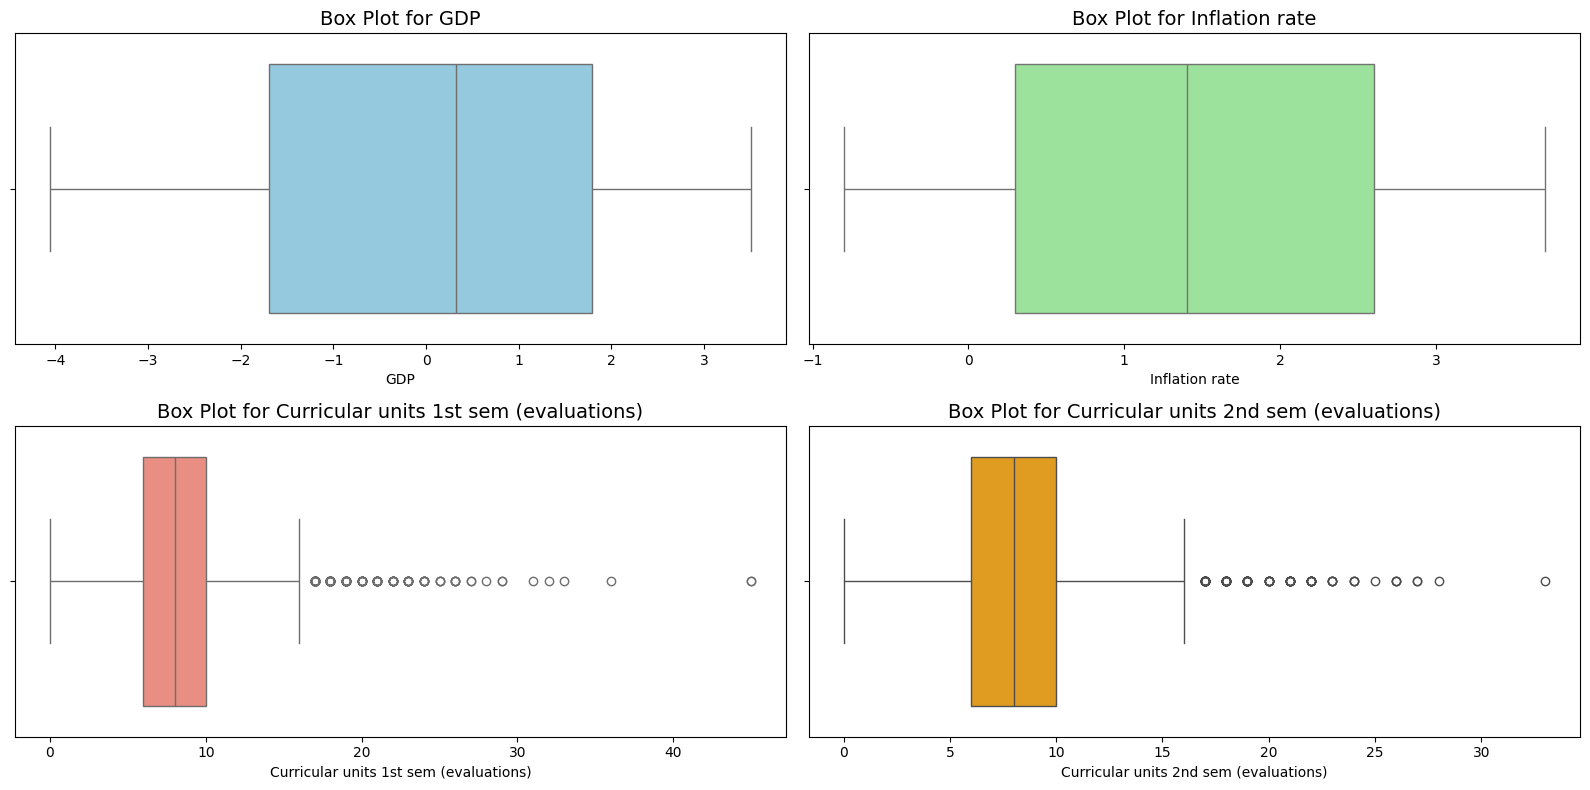

In [30]:
get_boxplot(data = dataset, x_var = ["GDP", "Inflation rate", "Curricular units 1st sem (evaluations)", "Curricular units 2nd sem (evaluations)"])

Statistical Metrics

In [31]:
variables = ["Curricular units 1st sem (evaluations)", "Curricular units 2nd sem (evaluations)"]
dataset[variables].describe()

,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations)
count,4424.000000,4424.000000
mean,8.299051,8.063291
std,4.179106,3.947951
min,0.000000,0.000000
25%,6.000000,6.000000
50%,8.000000,8.000000
75%,10.000000,10.000000
max,45.000000,33.000000


#### Correlation Analysis

In [35]:
variables =  ['Application order',
  'Daytime/evening attendance\t',
  'Previous qualification (grade)',
  'Admission grade',
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Scholarship holder',
  'Age at enrollment',
  'International',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)',
  'Unemployment rate',
  'Inflation rate',
  'GDP']

In [36]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


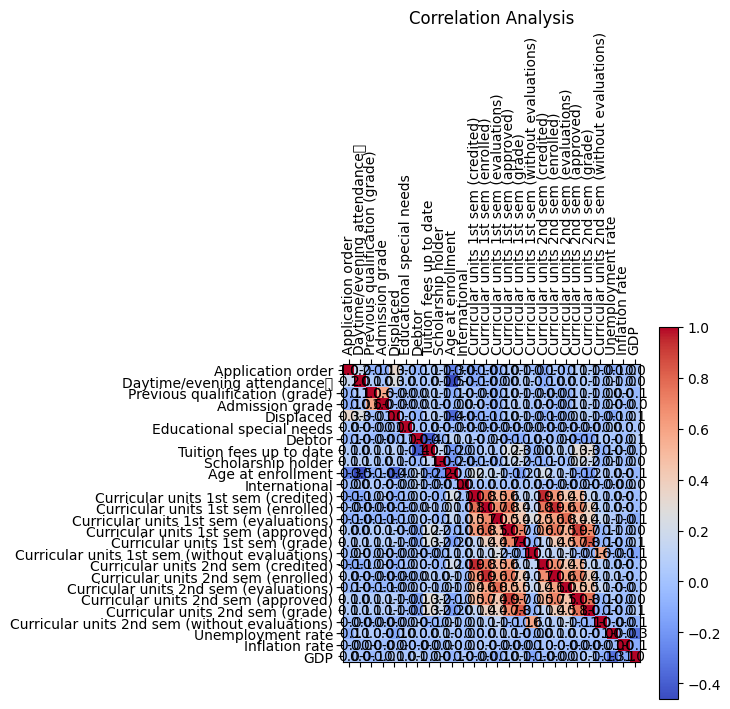

In [37]:
plot_correlation(dataset, variables)

Data Visualization for categorical variables

In [42]:
variables = ['Marital status',
  'Application mode',
  'Course',
  'Previous qualification',
  'Nacionality',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Gender',
  'Target']
variables

['Marital status',
 'Application mode',
 'Course',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Gender',
 'Target']

In [43]:
for col in variables:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Marital status ******
Marital status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64

***** Application mode ******
Application mode
1st phase - general contingent                         1708
2nd phase - general contingent                          872
Over 23 years old                                       785
Change of course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase - general contingent                          124
Transfer                                                 77
Change of institution/course                             59
1st phase - special contingent (Madeira Island)          38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st ph

Bar chart for absolute frequencies

In [44]:
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()    
    ax = sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%d")
    plt.title("Statistical analysis by " + col)
    plt.show()

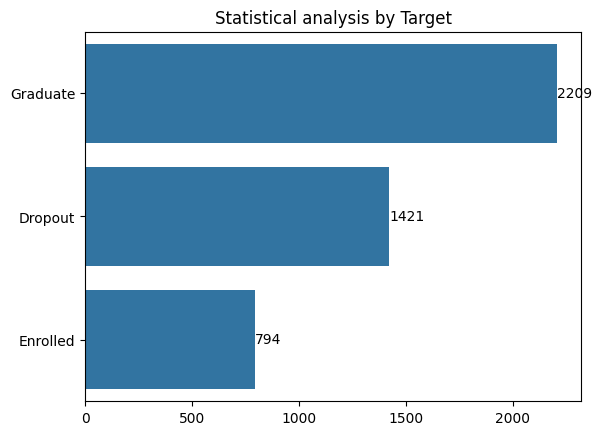

In [45]:
plot_barchart(dataset, col)

Pie chart for relative frequencies

In [46]:
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

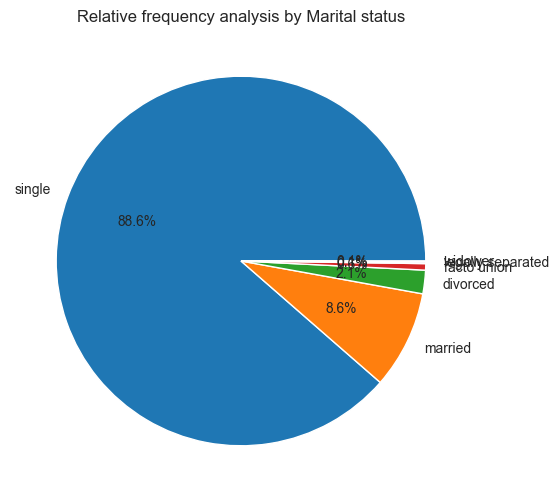

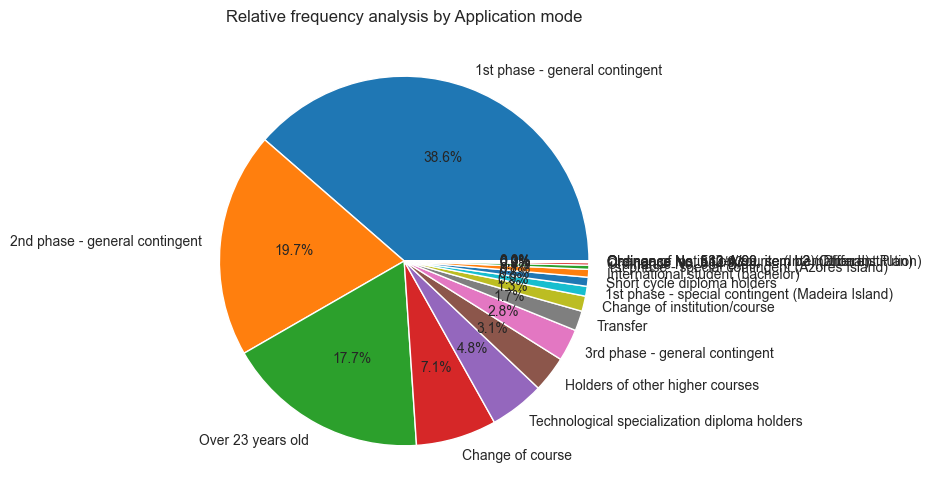

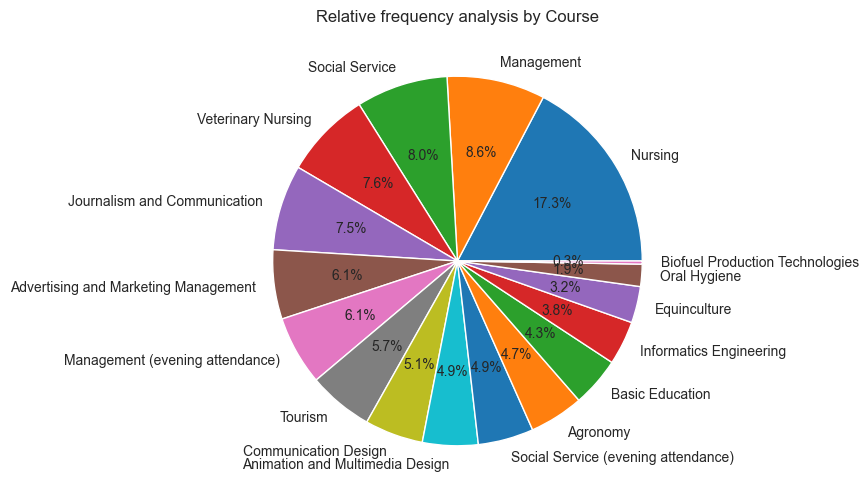

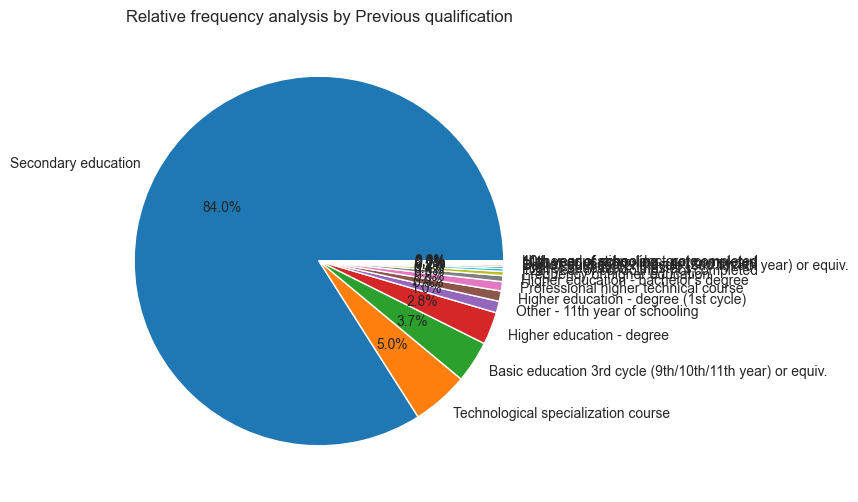

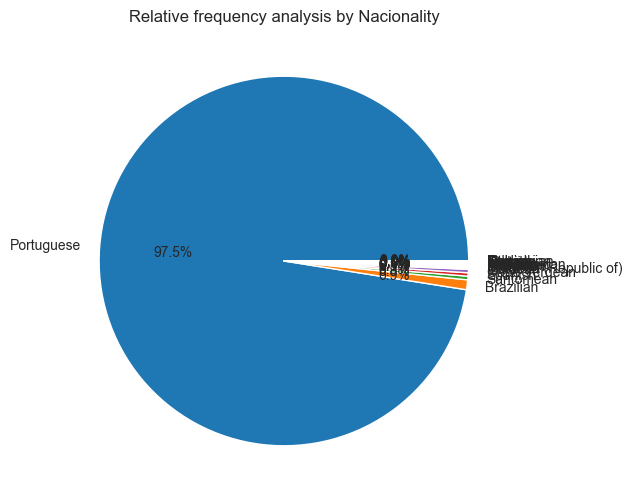

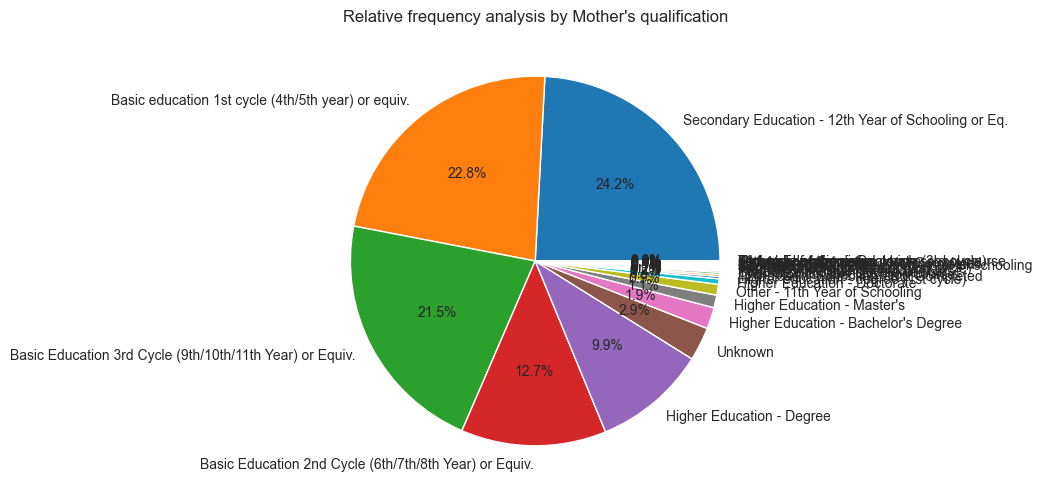

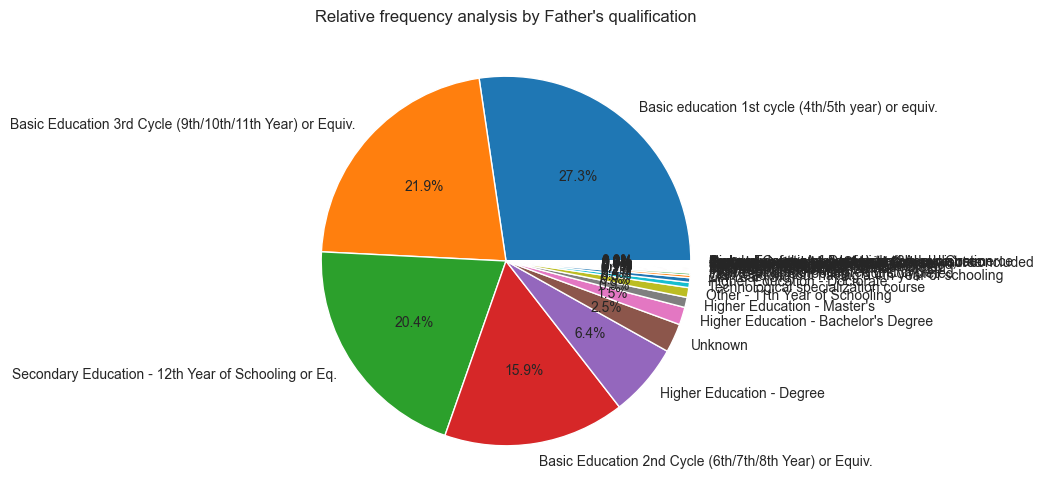

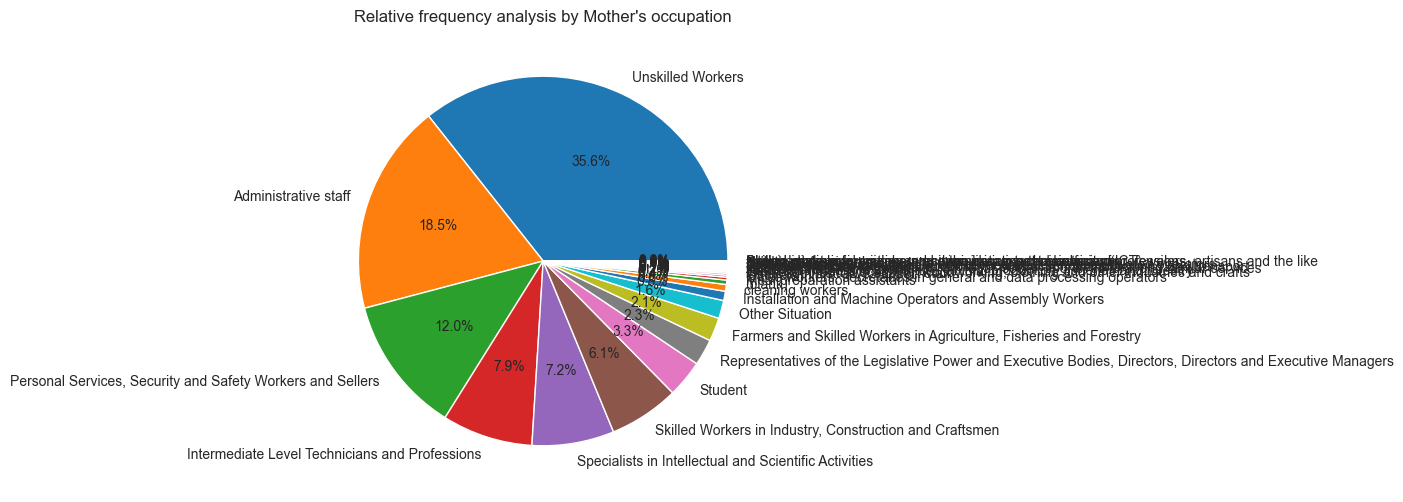

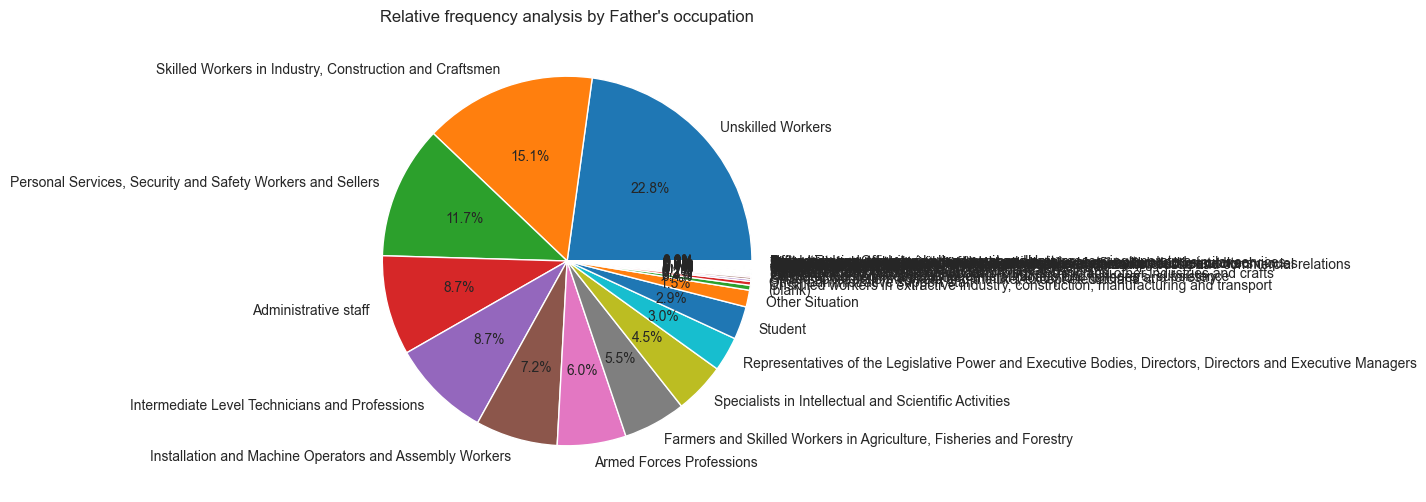

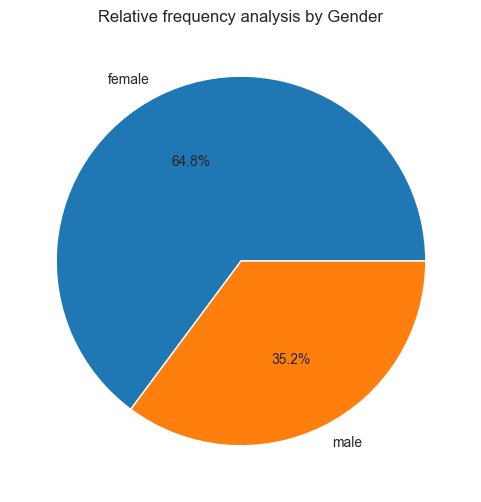

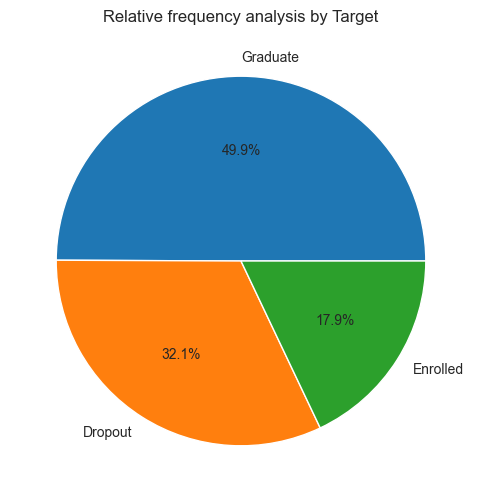

In [48]:
for col in variables:
    plot_piechart(dataset, col)

6. Statistical Analysis for subgroups

In [53]:
group01 = dataset.groupby(["Target","Marital status"]).size().reset_index(name = "samples")
print(group01)

      Target     Marital status  samples
0    Dropout           divorced       42
1    Dropout        facto union       11
2    Dropout  legally separated        4
3    Dropout            married      179
4    Dropout             single     1184
5    Dropout            widower        1
6   Enrolled           divorced       16
7   Enrolled        facto union        3
8   Enrolled  legally separated        1
9   Enrolled            married       52
10  Enrolled             single      720
11  Enrolled            widower        2
12  Graduate           divorced       33
13  Graduate        facto union       11
14  Graduate  legally separated        1
15  Graduate            married      148
16  Graduate             single     2015
17  Graduate            widower        1


In [54]:
top10_group01 = group01.nlargest(10, "samples")

others_group01 = group01[~group01.index.isin(top10_group01.index)]["samples"].sum()
others_row = pd.DataFrame({
    "Target": ["Others"],
    "Marital status": ["Others"],
    "samples": [others_group01]
})

final_group01 = pd.concat([top10_group01, others_row], ignore_index=True)

print(final_group01)

      Target Marital status  samples
0   Graduate         single     2015
1    Dropout         single     1184
2   Enrolled         single      720
3    Dropout        married      179
4   Graduate        married      148
5   Enrolled        married       52
6    Dropout       divorced       42
7   Graduate       divorced       33
8   Enrolled       divorced       16
9    Dropout    facto union       11
10    Others         Others       24


Absolute frequency analysis

In [55]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies')
    plt.tight_layout()
    plt.show()

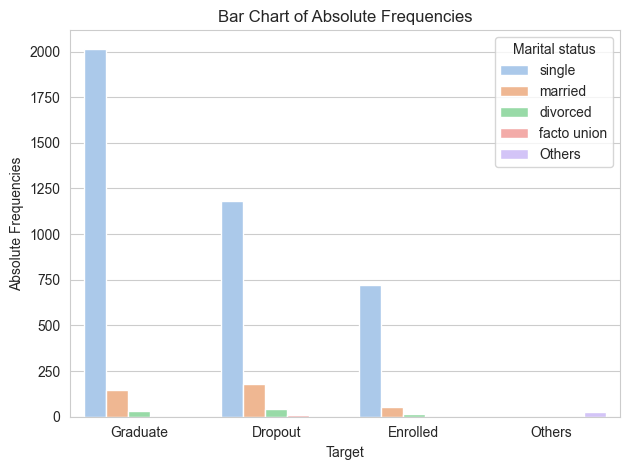

In [56]:
plot_absfreq_groups(final_group01, "Target", "Marital status")

Relative frequency analysis

In [57]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with " + group[g2] + " condition"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies')
    plt.show()

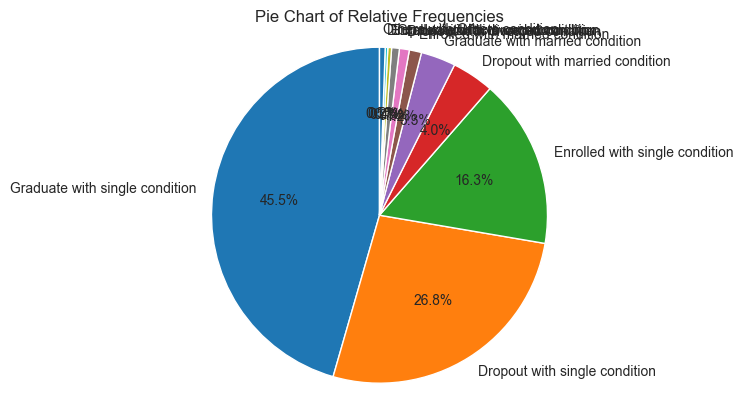

In [58]:
plot_relfreq_groups(final_group01, "Target", "Marital status")